# Question 3 

## Gaussian Filtering and Bilateral Filtering

## <b>Part 1</b>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

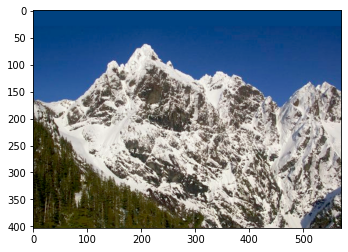

In [2]:
m = cv2.imread("images/mountain.png")
m = cv2.cvtColor(m,cv2.COLOR_BGR2RGB)
plt.imshow(m)

In [3]:
def padding(pic,k):
    #Padding
    #Number of row/columns needed for padding is floor(k/2)
    padNum = math.floor(k/2)
#     print(padNum)
    # 2k extra rows and columns are needed to accomodate both sides
    padPic = np.zeros((pic.shape[0]+(2*padNum),pic.shape[1]+(2*padNum),3))
#     print(padPic.shape)
    padPic[padNum:padPic.shape[0]-padNum, padNum:padPic.shape[1]-padNum,:] = pic
    # Image will start from (padNum,padNum)
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
#     print(pic.shape)
    padPic[xStart:xEnd, yStart:yEnd] = pic
#     plt.imshow(padPic,cmap='gray')
    return padPic.astype('int')

In [4]:
def gausFilter(img,s,q):
    k = math.floor(q/2)
    imgP = padding(img,k)
    out = np.zeros_like(imgP)
    sS = 2 * (s ** 2)
    kern = np.zeros([q,q])
    center = int(q/2)
    for i in range(q):
        for j in range(q):
            kern[i][j] = -1*((i-center)**2 + (j-center)**2)/s
    #For 3D
    kern = np.dstack((kern,kern,kern))
    for i in range(k,imgP.shape[0]-k):
        for j in range(k,imgP.shape[1]-k):
            kernCom = kern
            kernCom = np.exp(kernCom)
            out[i][j] = np.rint(np.sum(imgP[i-center:i+center+1,j-center:j+center+1]*kernCom,axis=(0,1))/np.sum(kernCom,axis=(0,1)))
    out = out[center:out.shape[0]-center,center:out.shape[1]-center,:]
    return out.astype('uint8')

#### Varying sigma for filter size = 5

In [5]:
k = 5
output1 = gausFilter(m, 5,5)
output2 = gausFilter(m, 25, 5)
output3 = gausFilter(m, 50, 5)
output4 = gausFilter(m, 100, 5)
output5 = gausFilter(m, 200, 5)

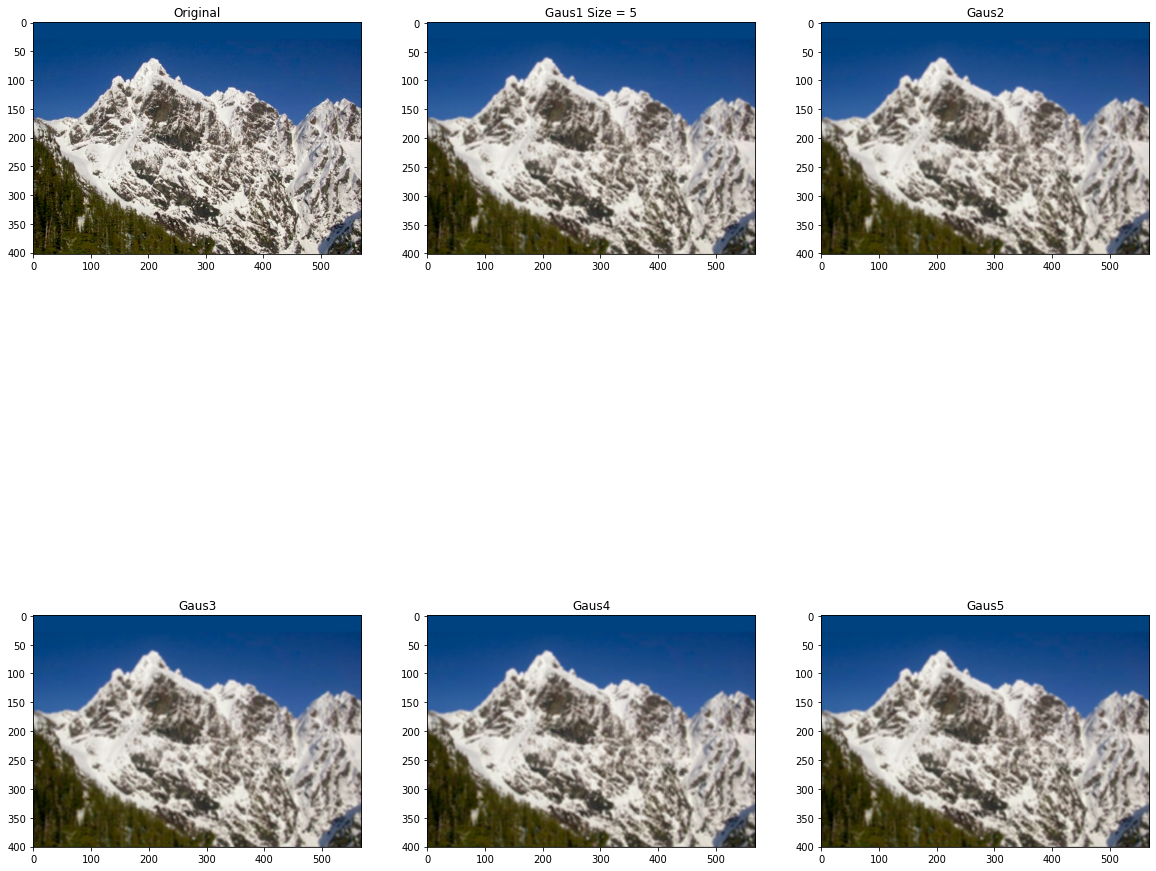

In [6]:
# Plotting
f, axarr = plt.subplots(2, 3, figsize=(20,20))
axarr[0][0].imshow(m)
axarr[0][0].title.set_text('Original',)
axarr[0][1].imshow(output1)
axarr[0][1].title.set_text('Gaus1 Size = 5')
axarr[0][2].imshow(output2)
axarr[0][2].title.set_text('Gaus2')
axarr[1][0].imshow(output3)
axarr[1][0].title.set_text('Gaus3')
axarr[1][1].imshow(output4)
axarr[1][1].title.set_text('Gaus4')
axarr[1][2].imshow(output5)
axarr[1][2].title.set_text('Gaus5')

#### Most Optimal Value of sigma for k = 5

To occupy 99% of range, we need to use 3sigma on both sides i.e. std = (k-1)/6

In [23]:
k = 5
# s = (5-1)/6
s = 0.67
outOptG = gausFilter(m, s,k)

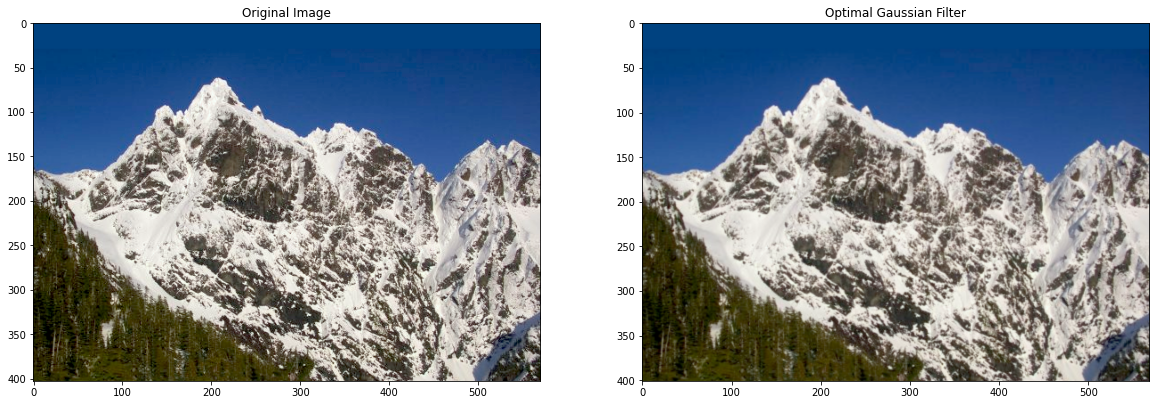

In [24]:
# Plotting
f, axarr = plt.subplots(1, 2, figsize=(20,20))
axarr[0].imshow(m)
axarr[0].title.set_text('Original Image')
axarr[1].imshow(outOptG)
axarr[1].title.set_text('Optimal Gaussian Filter')

#### Varying Filter Sizes

In [29]:
k = np.array([3,5,7,9,11,13])
s = (k-1)/6
output1 = gausFilter(m, s[0], k[0])
output2 = gausFilter(m, s[1], k[1])
output3 = gausFilter(m, s[2], k[2])
output4 = gausFilter(m, s[3], k[3])
output5 = gausFilter(m, s[4], k[4])
output6 = gausFilter(m, s[5], k[5])

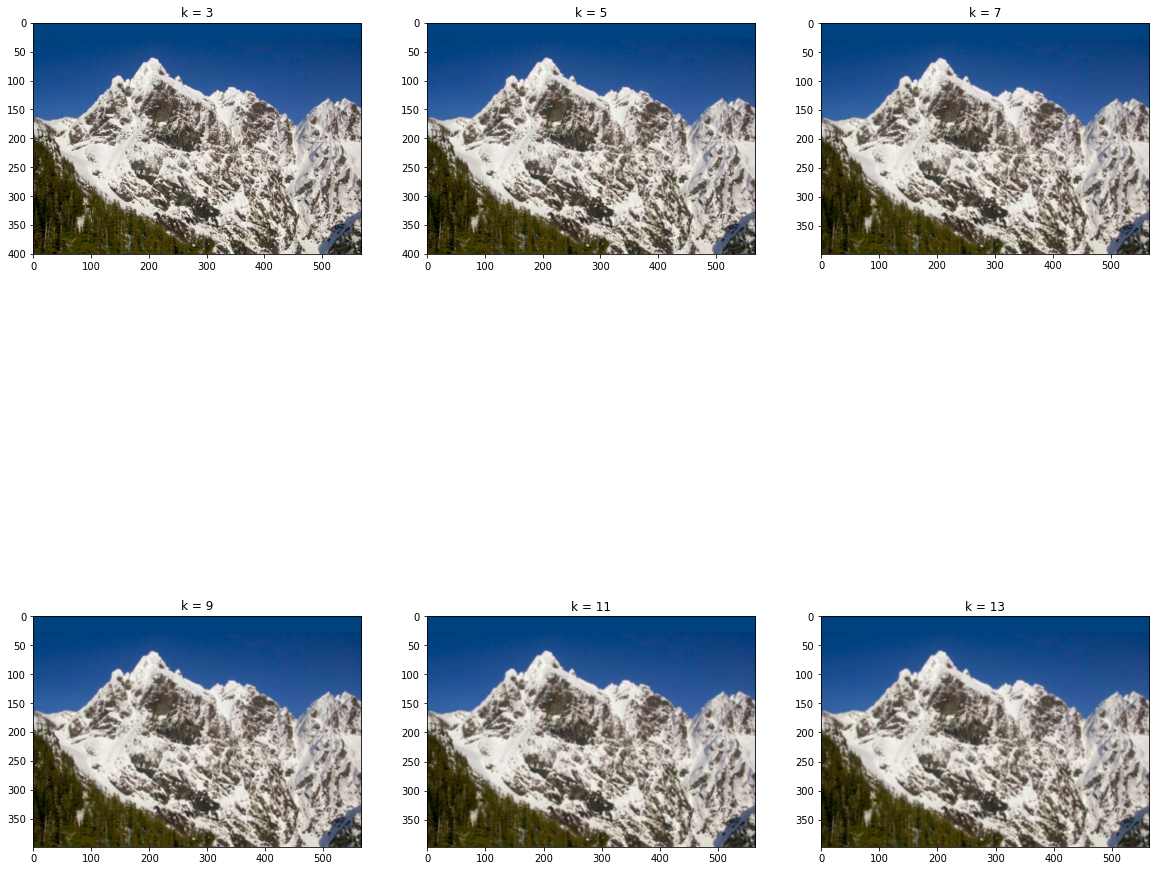

In [30]:
# Plotting
f, axarr = plt.subplots(2, 3, figsize=(20,20))
axarr[0][0].imshow(output1)
axarr[0][0].title.set_text('k = 3',)
axarr[0][1].imshow(output2)
axarr[0][1].title.set_text('k = 5')
axarr[0][2].imshow(output3)
axarr[0][2].title.set_text('k = 7')
axarr[1][0].imshow(output4)
axarr[1][0].title.set_text('k = 9')
axarr[1][1].imshow(output5)
axarr[1][1].title.set_text('k = 11')
axarr[1][2].imshow(output6)
axarr[1][2].title.set_text('k = 13')

## <b>Part 2</b>

In [25]:
def bilFilter(img,sS,sR,q):
    k = q//2
    imgP = padding(img,k)
    out = np.zeros_like(imgP)
    sS = 2 * (sS ** 2)
    sR = 2 * (sR ** 2)
    kern = np.zeros([q,q])
    center = q//2
    for i in range(q):
        for j in range(q):
            kern[i][j] = -1*((i-center)**2 + (j-center)**2)/sS
    #For 3D
    kern = np.dstack((kern,kern,kern))
    for i in range(k,imgP.shape[0]-k):
        for j in range(k,imgP.shape[1]-k):
            kern1 = -1*(imgP[i-center:i+center+1,j-center:j+center+1]-imgP[i][j])**2/sR
            kernCom = kern + kern1
            kernCom = np.exp(kernCom)
            out[i][j] = np.rint(np.sum(imgP[i-center:i+center+1,j-center:j+center+1]*kernCom,axis=(0,1))/np.sum(kernCom,axis=(0,1)))
                                
    out = out[center:out.shape[0]-center,center:out.shape[1]-center,:]
    return out.astype('uint8')

In [26]:
output1 = bilFilter(m, 110,60,19)
output2 = bilFilter(m, 34, 45, 15)

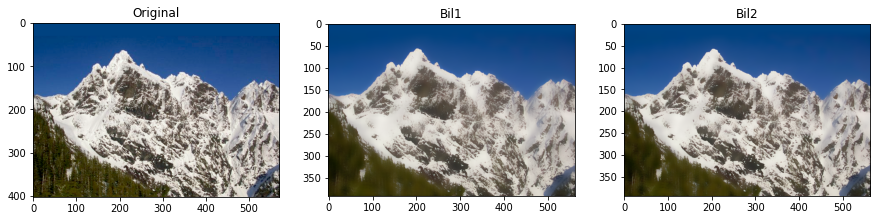

In [27]:
# Plotting
f, axarr = plt.subplots(1, 3, figsize=(15,8))
axarr[0].imshow(m)
axarr[0].title.set_text('Original',)
axarr[1].imshow(output1)
axarr[1].title.set_text('Bil1')
axarr[2].imshow(output2)
axarr[2].title.set_text('Bil2')

## <b>Part 3</b>

In [31]:
output1  = bilFilter(m,  50, 50, 9)
output2  = bilFilter(m,  50,  5, 9)
output3  = bilFilter(m,   5, 50, 9)
output4  = bilFilter(m,   5,  5, 9)
output5  = bilFilter(m,  50, 50, 15)
output6  = bilFilter(m,  50,  5, 15)
output7  = bilFilter(m,   5, 50, 15)
output8  = bilFilter(m,   5,  5, 15)
output9  = bilFilter(m,  50, 50, 21)
output10 = bilFilter(m,  50,  5, 21)
output11 = bilFilter(m,   5, 50, 21)
output12 = bilFilter(m,   5,  5, 21)

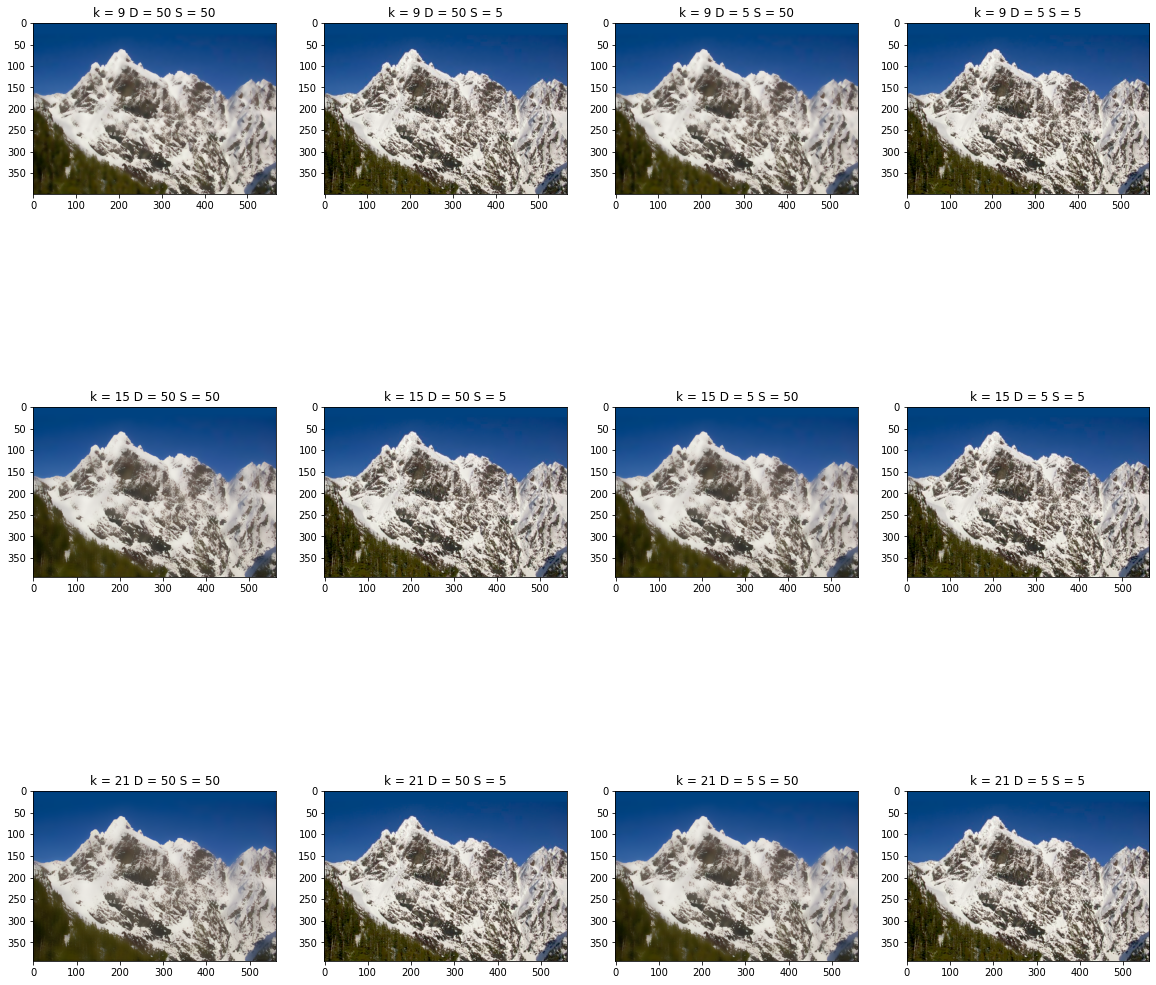

In [34]:
# Plotting
f, axarr = plt.subplots(3, 4, figsize=(20,20))
axarr[0][0].imshow(output1)
axarr[0][0].title.set_text('k = 9 D = 50 S = 50')
axarr[0][1].imshow(output2)
axarr[0][1].title.set_text('k = 9 D = 50 S = 5')
axarr[0][2].imshow(output3)
axarr[0][2].title.set_text('k = 9 D = 5 S = 50')
axarr[0][3].imshow(output4)
axarr[0][3].title.set_text('k = 9 D = 5 S = 5')
axarr[1][0].imshow(output5)
axarr[1][0].title.set_text('k = 15 D = 50 S = 50')
axarr[1][1].imshow(output6)
axarr[1][1].title.set_text('k = 15 D = 50 S = 5')
axarr[1][2].imshow(output7)
axarr[1][2].title.set_text('k = 15 D = 5 S = 50')
axarr[1][3].imshow(output8)
axarr[1][3].title.set_text('k = 15 D = 5 S = 5')
axarr[2][0].imshow(output9)
axarr[2][0].title.set_text('k = 21 D = 50 S = 50')
axarr[2][1].imshow(output10)
axarr[2][1].title.set_text('k = 21 D = 50 S = 5')
axarr[2][2].imshow(output11)
axarr[2][2].title.set_text('k = 21 D = 5 S = 50')
axarr[2][3].imshow(output12)
axarr[2][3].title.set_text('k = 21 D = 5 S = 5')

### Obserations

The Domain component is used to blur the image as we see that when D is higher, the blurring effect is more. <br>
On the other hand, the range component is used to preserve edges of image as range decreases, if it is too high, it corresponds to having a purely gaussian blur.<br>
So,
1. Range component is inversely proportional to edge preservation.
2. Domain component is directly proportiona to the extent of blurring.

